In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Домашняя работа по уроку 8. Корреляционный анализ

## Задача 1

Даны значения величины заработной платы заемщиков банка (zp) 

и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].

Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy

Полученные значения должны быть равны.

Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, 

а затем с использованием функций из библиотек numpy и pandas.

### Решение

In [5]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
# Ковариация
cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
cov

9157.839999999997

In [8]:
# Ковариация с помощью библиотеки numpy
cov = np.cov(zp, ks, ddof=0)
cov

array([[ 3494.64,  9157.84],
       [ 9157.84, 30468.89]])

In [9]:
# Коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков
corrcoef = np.cov(zp, ks, ddof=1) / (np.std(zp, ddof=1) * np.std(ks, ddof=1))
corrcoef

array([[0.33866702, 0.88749009],
       [0.88749009, 2.95275283]])

In [25]:
# Коэффициент корреляции Пирсона с использованием функций из библиотеки numpy
corrcoef = np.corrcoef(zp, ks)
corrcoef

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

In [26]:
# Коэффициент корреляции Пирсона с использованием функций из библиотеки pandas
zp_ = pd.Series(zp)
ks_ = pd.Series(ks)
r = zp_.corr(ks_)
r1 = ks_.corr(zp_)
r, r1

(0.8874900920739162, 0.8874900920739162)

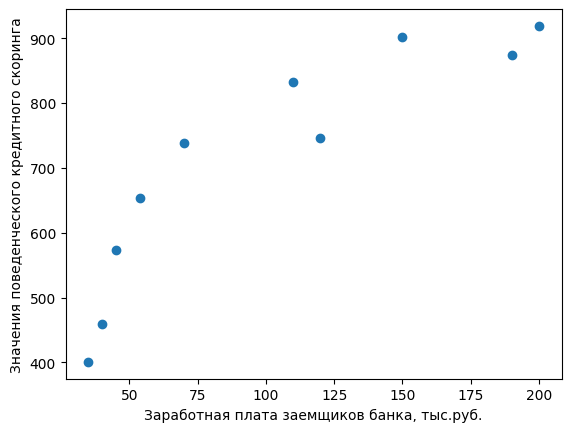

In [24]:
# pd.DataFrame(np.array([zp,ks]).T).plot.scatter(0, 1, s=12)
plt.scatter(zp, ks)
plt.xlabel('Заработная плата заемщиков банка, тыс.руб.')
plt.ylabel('Значения поведенческого кредитного скоринга')
plt.show()

-----------

## Задача 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111.

Известно, что в генеральной совокупности IQ распределен нормально.

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

### Решение

Так как оцениваем значение средней, при этом не зная дисперсию, используем формулу:

X - tα/2 * (σ / sqrt(n))

X + tα/2 * (σ / sqrt(n))

In [28]:
alpha = 0.05
x = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
n = len(x)
mean = np.mean(x) # среднее
t = stats.t.ppf(0.975, n - 1) # t-критерий
std = np.std(x, ddof=1) # среднее квадратичное отклонение несмещенное 
min = mean - t * (std / np.sqrt(n)) # нижняя граница интервала
max = mean + t * (std / np.sqrt(n)) # верхняя граница интервала
mean, min, max

(118.1, 110.55608365158724, 125.64391634841274)

Ответ: p(110.56 < x < 125.64) = 0.95

-----------

## Задача 3

Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. 

Объем выборки равен 27, среднее выборочное составляет 174.2. 

Найдите доверительный интервал для математического ожидания с надежностью 0.95.

### Решение

Так как интервал будем строить для оценки математического ожидания

и нам известна дисперсия генеральной совокупности, используем формулу:

X - Zα/2 * (σ / sqrt(n))

X + Zα/2 * (σ / sqrt(n))

In [29]:
std = np.sqrt(25)
alpha = 0.05
x = 174.2
n = 27
min = x - 1.96 * (std / np.sqrt(n))
max = x + 1.96 * (std / np.sqrt(n))
min, max

(172.31398912064722, 176.08601087935276)

Ответ: p(172.31 < x < 176.09) = 0.95